<a href="https://colab.research.google.com/github/ingrafa/Aprende-Machine-Learning/blob/main/Proyecto_Integrador_IA_JULIA_ANGAMARCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salesian Polytechnic University
**<h1> Proyecto Integrador Interciclo
Desarrollo de una red neuronal con conexión hacia adelante para clasificar íconos.</h1>**

*Desarrollar una red neuronal artificial que realice un proceso de clasificación de imágenes (medianas) que representan diferentes categorías*.

## Recursos

Recursos para Implementar el proyecto integrador:

### Indice
- [Introducción a Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guía de  Markdown](/notebooks/markdown_guide.ipynb)
- [Importar Librerías e Instalar Dependencias](/notebooks/snippets/importing_libraries.ipynb)
- [Guardar y cargar cuadernos en GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Formularios Interactivos](/notebooks/forms.ipynb)
- [Widgets Interactivos](/notebooks/widgets.ipynb)

### Trabajando con Datos
- [Cargar datos desde: Drive, Sheets y Google Cloud Storage](/notebooks/io.ipynb) 
- [Gráficas: Visualizar los Datos](/notebooks/charts.ipynb)
- [Introducción a BigQuery](/notebooks/bigquery.ipynb)

### Introducción al Aprendizaje Automático
Estos son algunos notebooks del curso virtual de google sobre aprendizaje automático. Ver la [página web del curso](https://developers.google.com/machine-learning/crash-course/) para obtener más información.
- [Introducción a Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Conceptos de Tensorflow](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [Primeros pasos con TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Introducción a Redes Neuronales](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Introducción a datos escasos y embebimientos](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Hardware para cálculo en paralelo
- [TensorFlow con GPUs](/notebooks/gpu.ipynb)
- [TensorFlow con TPUs](/notebooks/tpu.ipynb)

# Importamos Librerias Necesarias 

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import optimizers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as pp
import matplotlib.cbook as cbook
import matplotlib.image as image
from collections import namedtuple
%matplotlib inline



Cargamos el Corpus de categoria de Imagenes desde Google Drve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/animales')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0



dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/animales/
/content/drive/MyDrive/animales/elephant 1
/content/drive/MyDrive/animales/eagle 60
/content/drive/MyDrive/animales/duck 60
/content/drive/MyDrive/animales/dragonfly 60
/content/drive/MyDrive/animales/donkey 60
/content/drive/MyDrive/animales/dolphin 60
/content/drive/MyDrive/animales/dog 60
/content/drive/MyDrive/animales/deer 60
/content/drive/MyDrive/animales/crow 60
/content/drive/MyDrive/animales/crab 60
/content/drive/MyDrive/animales/coyote 60
/content/drive/MyDrive/animales/cow 60
/content/drive/MyDrive/animales/cockroach 60
/content/drive/MyDrive/animales/chimpanzee 60
/content/drive/MyDrive/animales/caterpillar 60
/content/drive/MyDrive/animales/cat 60
/content/drive/MyDrive/animales/butterfly 60
/content/drive/MyDrive/animales/boar 60
/content/drive/MyDrive/animales/bison 60
/content/drive/MyDrive/animales/beetle 60
/content/drive/MyDrive/animales/bee 60
/content/drive/MyDrive/animales/bear 60
/content/drive/MyDrive/anima

Etiquetas de cantidad de archivos

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))



Cantidad etiquetas creadas:  1500


Nombres de los archivos

In [6]:
animals=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    animals.append(name[len(name)-1])
    indice=indice+1
    

0 elephant
1 eagle
2 duck
3 dragonfly
4 donkey
5 dolphin
6 dog
7 deer
8 crow
9 crab
10 coyote
11 cow
12 cockroach
13 chimpanzee
14 caterpillar
15 cat
16 butterfly
17 boar
18 bison
19 beetle
20 bee
21 bear
22 bat
23 badger
24 antelope


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  25
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)



Training data shape :  (1200, 150, 150, 3) (1200,)
Testing data shape :  (300, 150, 150, 3) (300,)


In [9]:

# Normalizamos los valores de las imágenes entre 0 y 1
train_x = train_X.astype('float32')
test_x = test_X.astype('float32')

train_X = train_X/225.
test_x = test_x/225
print('testing: ', train_X.shape, test_X.shape)

testing:  (1200, 150, 150, 3) (300, 150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Ground Truth : 6')

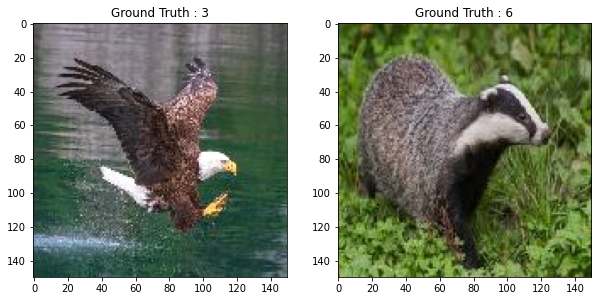

In [10]:

plt.figure(figsize=[10,10])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[12,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[10,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


# Preprocesamos las imagenes

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
train_X_gd, valid_X_gd, train_label_gd, valid_label_gd = train_test_split(train_X, train_Y_one_hot, test_size=0.2,stratify = train_Y_one_hot, random_state=1500)
print(train_X_gd.shape,valid_X_gd.shape,train_label_gd.shape,valid_label_gd.shape)
print(train_X_gd[0]," - ", train_label_gd[0])

(960, 150, 150, 3) (240, 150, 150, 3) (960, 25) (240, 25)
[[[0.00177778 0.00172549 0.00097603]
  [0.00191721 0.00186492 0.00111547]
  [0.00212636 0.00207407 0.00132462]
  ...
  [0.00263181 0.00275381 0.00181264]
  [0.00271895 0.00284096 0.00193464]
  [0.00284096 0.00291068 0.00203922]]

 [[0.00191721 0.00186492 0.00111547]
  [0.00205664 0.00200436 0.0012549 ]
  [0.00223094 0.00217865 0.00142919]
  ...
  [0.00270153 0.00282353 0.00188235]
  [0.00277124 0.00289325 0.00198693]
  [0.00282353 0.00294553 0.00205664]]

 [[0.00203922 0.00198693 0.00123747]
  [0.00216122 0.00210893 0.00135948]
  [0.00231808 0.0022658  0.00151634]
  ...
  [0.00278867 0.00291068 0.0019695 ]
  [0.00282353 0.00294553 0.00203922]
  [0.00282353 0.0029281  0.0020915 ]]

 ...

 [[0.00195207 0.00242266 0.00059259]
  [0.00198693 0.00245752 0.00062745]
  [0.00228322 0.00275381 0.00092375]
  ...
  [0.00320697 0.00350327 0.00210893]
  [0.00325926 0.00357298 0.00214379]
  [0.00332898 0.0036427  0.00217865]]

 [[0.00191721 0.

# Creamos el modelo de CNN

In [15]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 30 # cantidad de imágenes que se toman a la vez en memoria

In [16]:
animals_model = Sequential()
animals_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(150, 150, 3)))
animals_model.add(LeakyReLU(alpha=0.1))
animals_model.add(MaxPooling2D((2, 2),padding='same'))
animals_model.add(Dropout(0.5))

animals_model.add(Flatten())
animals_model.add(Dense(32, activation='linear'))
animals_model.add(LeakyReLU(alpha=0.1))
animals_model.add(Dropout(0.5))
animals_model.add(Dense(nClasses, activation='softmax'))

In [17]:
animals_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 32)                5760032   
                                                        

In [18]:
animals_model.compile(optimizer= "adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#model.summary()


In [19]:
animals_model2 = Sequential()
animals_model2.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(150, 150, 3)))
animals_model2.add(LeakyReLU(alpha=0.1))
animals_model2.add(MaxPooling2D((2, 2),padding='same'))
animals_model2.add(Dropout(0.5))

animals_model2.add(Flatten())
animals_model2.add(Dense(64, activation='linear'))
animals_model2.add(LeakyReLU(alpha=0.1))
animals_model2.add(Dropout(0.5))
animals_model2.add(Dense(nClasses, activation='softmax'))


In [20]:
animals_model2.compile(optimizer= "adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#model.summary()


# Entrenamos el modelo: Aprende a clasificar imágenes

In [21]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi toshiba tarda 4 minutos
#sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

animals_train = animals_model.fit(train_X_gd, train_label_gd,validation_data = (valid_X_gd, valid_label_gd), epochs = 30, batch_size = 64)

Epoch 1/30
15/15 [==============================] - 26s 2s/step - loss: 3.2209 - accuracy: 0.0490 - val_loss: 3.2320 - val_accuracy: 0.0375
Epoch 2/30
15/15 [==============================] - 20s 1s/step - loss: 3.2296 - accuracy: 0.0375 - val_loss: 3.2083 - val_accuracy: 0.0708
Epoch 3/30
15/15 [==============================] - 17s 1s/step - loss: 3.2099 - accuracy: 0.0490 - val_loss: 3.1996 - val_accuracy: 0.0708
Epoch 4/30
15/15 [==============================] - 18s 1s/step - loss: 3.1998 - accuracy: 0.0542 - val_loss: 3.1994 - val_accuracy: 0.0500
Epoch 5/30
15/15 [==============================] - 17s 1s/step - loss: 3.1903 - accuracy: 0.0604 - val_loss: 3.1719 - val_accuracy: 0.1167
Epoch 6/30
15/15 [==============================] - 17s 1s/step - loss: 3.1487 - accuracy: 0.0781 - val_loss: 3.1515 - val_accuracy: 0.0792
Epoch 7/30
15/15 [==============================] - 17s 1s/step - loss: 3.1417 - accuracy: 0.0885 - val_loss: 3.1492 - val_accuracy: 0.0833
Epoch 8/30
15/15 [==

In [22]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
# animals_model.save("animales.h5py")
animals_model.save('/content/drive/MyDrive/Modelo/modelsRNA/animalesmodel1.h5')
animals_model.save_weights('/content/drive/MyDrive/Modelo/modelsRNA/animalesloss1.h5')

In [23]:
#Segunod entrenamiento
animals_train2 = animals_model2.fit(train_X_gd, train_label_gd,validation_data = (valid_X_gd, valid_label_gd), epochs = 30, batch_size = 60)

Epoch 1/30
16/16 [==============================] - 33s 2s/step - loss: 3.2220 - accuracy: 0.0437 - val_loss: 3.2039 - val_accuracy: 0.0875
Epoch 2/30
16/16 [==============================] - 31s 2s/step - loss: 3.2149 - accuracy: 0.0510 - val_loss: 3.1927 - val_accuracy: 0.0542
Epoch 3/30
16/16 [==============================] - 33s 2s/step - loss: 3.2027 - accuracy: 0.0573 - val_loss: 3.1823 - val_accuracy: 0.0917
Epoch 4/30
16/16 [==============================] - 31s 2s/step - loss: 3.1852 - accuracy: 0.0729 - val_loss: 3.1554 - val_accuracy: 0.1292
Epoch 5/30
16/16 [==============================] - 32s 2s/step - loss: 3.1608 - accuracy: 0.0646 - val_loss: 3.1356 - val_accuracy: 0.0917
Epoch 6/30
16/16 [==============================] - 31s 2s/step - loss: 3.1299 - accuracy: 0.0885 - val_loss: 3.0987 - val_accuracy: 0.1333
Epoch 7/30
16/16 [==============================] - 31s 2s/step - loss: 3.1047 - accuracy: 0.0885 - val_loss: 3.0855 - val_accuracy: 0.1417
Epoch 8/30
16/16 [==

In [24]:
animals_model2.save('/content/drive/MyDrive/Modelo/modelsRNA/animalesmodel2.h5')
animals_model2.save_weights('/content/drive/MyDrive/Modelo/modelsRNA/animalesloss2.h5')

# Evaluamos la red

In [25]:
test_eval = animals_model.evaluate(test_X, test_Y_one_hot, verbose=1)
test_eval2 = animals_model2.evaluate(test_X, test_Y_one_hot, verbose=1)

10/10 [==============================] - 3s 306ms/step - loss: 548.8984 - accuracy: 0.0733


In [26]:
print('MODELO 1')
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
print('****************************')
print('MODELO 2')
print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])

MODELO 1
Test loss: 554.3694458007812
Test accuracy: 0.0533333346247673
****************************
MODELO 2
Test loss: 548.8983764648438
Test accuracy: 0.07333333045244217


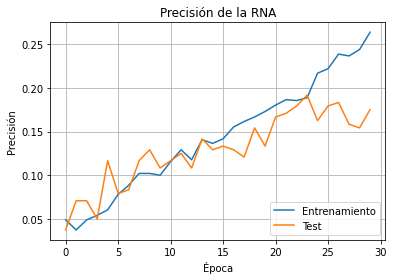

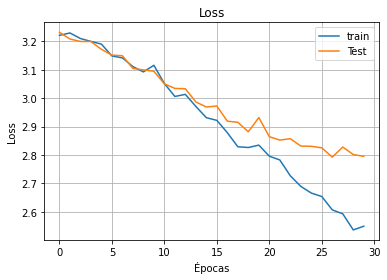

In [27]:
a1=animals_train.history['accuracy']
va1=animals_train.history['val_accuracy']
pp.plot(animals_train.history['accuracy'])
pp.plot(animals_train.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/testtrain1.png")
pp.show()
print("\n")
l1= animals_train.history['loss']
vl1=animals_train.history['val_loss']
pp.plot(animals_train.history['loss'])
pp.plot(animals_train.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Épocas')
pp.legend(['train','Test'], loc='upper right')
pp.grid(True)
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/loss1.png")
pp.show()

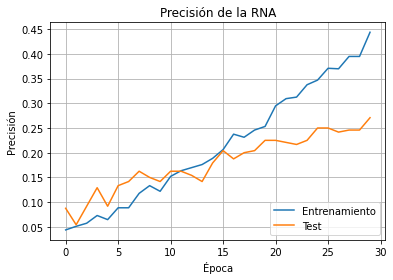

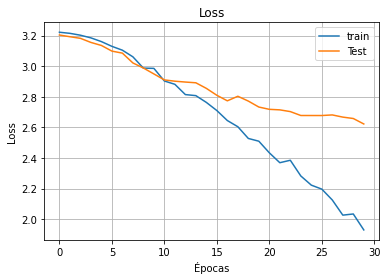

In [28]:
a2=animals_train2.history['accuracy']
va2=animals_train2.history['val_accuracy']
p2=animals_train2.history['accuracy']
pp.plot(animals_train2.history['accuracy'])
pp.plot(animals_train2.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/testtrain2.png")
pp.show()
print("\n")

l2= animals_train2.history['loss']
vl2=animals_train2.history['val_loss']
pp.plot(animals_train2.history['loss'])
pp.plot(animals_train2.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Épocas')
pp.legend(['train','Test'], loc='upper right')
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/loss2.png")
pp.grid(True)
pp.show()

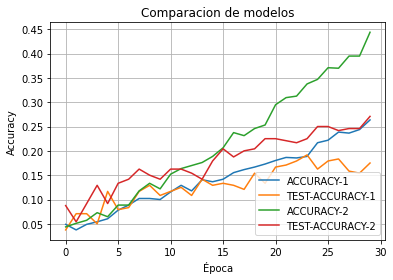

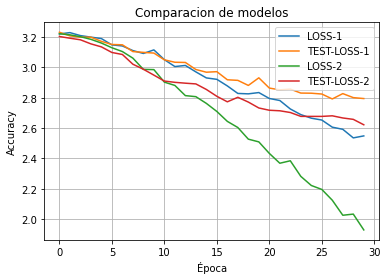

In [29]:
pp.plot(a1)
pp.plot(va1)
pp.plot(a2)
pp.plot(va2)
pp.title('Comparacion de modelos')
pp.ylabel('Accuracy')
pp.xlabel('Época')
pp.legend(['ACCURACY-1','TEST-ACCURACY-1','ACCURACY-2','TEST-ACCURACY-2','ACCURACY-3','TEST-ACCURACY-3'], loc='lower right')
pp.grid(True)
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/comparacionA.png")
pp.show()

print("\n")

pp.plot(l1)
pp.plot(vl1)
pp.plot(l2)
pp.plot(vl2)
pp.title('Comparacion de modelos')
pp.ylabel('Accuracy')
pp.xlabel('Época')
pp.legend(['LOSS-1','TEST-LOSS-1','LOSS-2','TEST-LOSS-2','LOSS-3','TEST-LOSS-3'], loc='upper right')
pp.grid(True)
pp.savefig("/content/drive/MyDrive/Modelo/modelsRNA/comparacionB.png")
pp.show()


In [30]:
predicted_classes2 = animals_model.predict(test_X)

In [33]:
predicted_classes=[]
for predicted_animal in predicted_classes2:
    predicted_classes.append(predicted_animal.tolist().index(max(predicted_animal)))
predicted_classes=np.array(predicted_classes)

In [34]:
predicted_classes.shape, test_Y.shape

((300,), (300,))

In [35]:
predicted_classes_mod2 = animals_model2.predict(test_X)

In [36]:
predicted_classesM2=[]
for predicted_animals in predicted_classes_mod2:
    predicted_classesM2.append(predicted_animals.tolist().index(max(predicted_animals)))
predicted_classesM2=np.array(predicted_classesM2)

In [37]:
predicted_classesM2.shape, test_Y.shape

((300,), (300,))

# Aprendamos de los errores: Qué mejorar

Found 16 correct labels


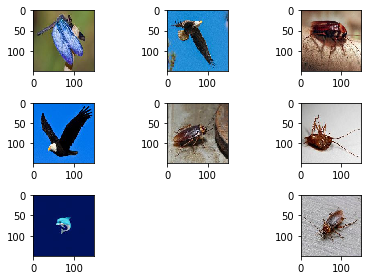

In [38]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(150,150,3), cmap='gray', interpolation='none')
    #plt.title("{}, {}".format(deportes[predicted_classes[correct]],
    #                                                deportes[test_Y[correct]]))

    plt.tight_layout()

Found 284 incorrect labels


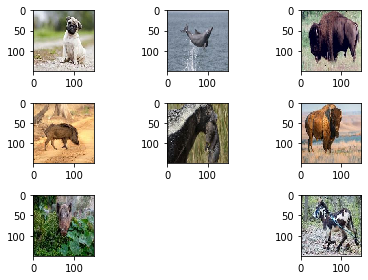

In [39]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(150,150,3), cmap='gray', interpolation='none')
    #plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
     #                                               deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [40]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         9
     Class 1       0.50      0.20      0.29        10
     Class 2       0.00      0.00      0.00        13
     Class 3       0.12      0.17      0.14        12
     Class 4       0.00      0.00      0.00         7
     Class 5       1.00      0.08      0.15        12
     Class 6       0.00      0.00      0.00        16
     Class 7       0.00      0.00      0.00        12
     Class 8       0.00      0.00      0.00         6
     Class 9       0.00      0.00      0.00        12
    Class 10       0.00      0.00      0.00         7
    Class 11       0.00      0.00      0.00        15
    Class 12       0.04      1.00      0.07        10
    Class 13       0.00      0.00      0.00        14
    Class 14       0.00      0.00      0.00        15
    Class 15       0.33      0.08      0.12        13
    Class 16       0.00      0.00      0.00         9
    Class 17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediccion de una nueva imagen

In [41]:

import keras
from tensorflow.keras.utils import to_categorical
from keras.models import load_model


In [42]:
def prueba(ruta):
    icons = np.load(ruta, allow_pickle = True).item()
    imagenes=np.rollaxis(icons['image'], 1, 3)
    x = rgb2gray(imagenes)
    x = x.astype('float32')
    x = x / 255.
    y = to_categorical(np.array(icons['class']), num_classes=50)
    print(x.shape,y.shape)
    
    modelo = './modelo/modelo.h5'
    pesos_modelo = './modelo/pesos.h5'
    new_model = load_model(modelo)
    new_model.load_weights(pesos_modelo)

    new_predictions = new_model.predict(x)
    test_loss, test_acc = model.evaluate(x, y)
    print ('Precisión Evaluación: ', test_acc*100)
    

In [43]:
dirnameT = os.path.join(os.getcwd(), '/content/drive/MyDrive/animales/')
imgpathT = dirnameT + os.sep 

imagesT = []
directoriesT = []
dircountT = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpathT):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            imagesT.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directoriesT.append(root)
                dircountT.append(cant)
                cant=0



dircountT.append(cant)

dircountT = dircountT[1:]
dircountT[0]=dircountT[0]+1
print('Directorios leidos:',len(directoriesT))
print("Imagenes en cada directorio", dircountT)
print('suma Total de imagenes en subdirs:',sum(dircountT))

leyendo imagenes de  /content/drive/MyDrive/animales/
/content/drive/MyDrive/animales//elephant 1
/content/drive/MyDrive/animales//eagle 60
/content/drive/MyDrive/animales//duck 60
/content/drive/MyDrive/animales//dragonfly 60
/content/drive/MyDrive/animales//donkey 60
/content/drive/MyDrive/animales//dolphin 60
/content/drive/MyDrive/animales//dog 60
/content/drive/MyDrive/animales//deer 60
/content/drive/MyDrive/animales//crow 60
/content/drive/MyDrive/animales//crab 60
/content/drive/MyDrive/animales//coyote 60
/content/drive/MyDrive/animales//cow 60
/content/drive/MyDrive/animales//cockroach 60
/content/drive/MyDrive/animales//chimpanzee 60
/content/drive/MyDrive/animales//caterpillar 60
/content/drive/MyDrive/animales//cat 60
/content/drive/MyDrive/animales//butterfly 60
/content/drive/MyDrive/animales//boar 60
/content/drive/MyDrive/animales//bison 60
/content/drive/MyDrive/animales//beetle 60
/content/drive/MyDrive/animales//bee 60
/content/drive/MyDrive/animales//bear 60
/conte

In [44]:
labels2=[]
indice2=0
for cantidad in dircountT:
    for i in range(cantidad):
        labels2.append(indice2)
    indice2=indice2+1
print("Cantidad etiquetas creadas: ",len(labels2))

Cantidad etiquetas creadas:  1500


In [45]:
animals2=[]
indice3=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice3 , name[len(name)-1])
    animals2.append(name[len(name)-1])
    indice3=indice3+1

0 elephant
1 eagle
2 duck
3 dragonfly
4 donkey
5 dolphin
6 dog
7 deer
8 crow
9 crab
10 coyote
11 cow
12 cockroach
13 chimpanzee
14 caterpillar
15 cat
16 butterfly
17 boar
18 bison
19 beetle
20 bee
21 bear
22 bat
23 badger
24 antelope


In [46]:
#y1 = np.array(labels2)
y1 = to_categorical(np.array(labels2), num_classes=25)
X1 = np.array(imagesT, dtype=np.uint8) #convierto de lista a numpy

X1 = X1.astype('float32')
X1 = X1 / 255.
print(X1.shape,y1.shape)

modelo1 = '/content/drive/MyDrive/Modelo/modelsRNA/animalesmodel1.h5'
pesos_modelo = '/content/drive/MyDrive/Modelo/modelsRNA/animalesloss1.h5'
new_model = load_model(modelo1)
new_model.load_weights(pesos_modelo)

new_predictions = new_model.predict(X1)
test_loss, test_acc = new_model.evaluate(X1,y1)
print ('Precisión Evaluación: ', test_acc*100)


(1500, 150, 150, 3) (1500, 25)
47/47 [==============================] - 8s 176ms/step - loss: 498.6843 - accuracy: 0.0747
Precisión Evaluación:  7.466666400432587


#Concluciones:
<p>Se ha logrado entrenar la red neuronal creada a partir de los categorias de los corpus de los imagenes entregado respectivamente a cada Grupo.</p>
<p>Para este proyecto nos hemos basados en las clases inpartidas por el docente y los codigo que ha realizado en las clases.</p>
